Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/ashvin.sehgal/Python/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 6.83     |
|    ep_rew_mean     | -1e+03   |
| time/              |          |
|    fps             | 7218     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 8.09        |
|    ep_rew_mean          | -1e+03      |
| time/                   |             |
|    fps                  | 4305        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013205437 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.83       |
|    explained_variance   | -0.000707   |
|    learning_rate        | 0.

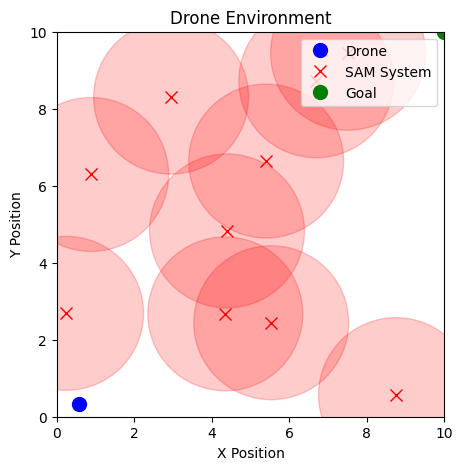

In [2]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from Envs.DroneEnvBox import DroneEnvBox

env = DroneEnvBox()
vec_env = make_vec_env(env, n_env=5)
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=1000000)
model.save('DroneEnvSB3PPO')

del model

model = PPO.load('DroneEnvSB3PPO')

obs = vec_env.reset()
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, reward, done, info = vec_env.step(action)
    vec_env.render('human')
    if done:
        obs = vec_env.reset()
vec_env.close()

In [2]:
import tensorflow as tf
import gym
import numpy as np
from Envs.DroneEnvContinuous import DroneEnvContinuous
env = DroneEnvContinuous()
env.reset()

array([0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.35, 0.  , 0.4 , 0.4 , 0.8 ,
       0.4 , 0.9 , 0.6 , 0.7 , 0.  , 1.  , 0.4 , 0.  , 1.  , 0.  , 0.35,
       0.4 , 0.8 , 0.6 , 0.9 , 0.  , 0.7 , 0.4 , 1.  , 0.  , 0.  ])

In [44]:
import tensorflow_probability as tfp
from tensorflow import keras
from keras.layers import *
from keras.models import Model

env = gym.vector.make('InvertedPendulum-v4',num_envs=2)
def model():
    state_input = Input(shape=(env.observation_space.shape[1],), dtype=tf.float32)
    x = Dense(16, activation='relu')(state_input)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(16, activation='relu')(x)

    mean_output = Dense(env.action_space.shape[1], activation='tanh')(x)
    std_output = Dense(env.action_space.shape[1], activation='sigmoid')(x)

    model = Model(inputs=state_input, outputs=[mean_output, std_output])
    return model

s, _ = env.reset()
model1 = model()
mean, std = model1(s, training=False)
dist = tfp.distributions.Normal(mean, std)
actions = tf.clip_by_value(3 * dist.sample(), env.action_space.low, env.action_space.high)
log_probs = tf.reduce_sum(dist.log_prob(actions),axis=-1).numpy()
actions.numpy()

array([[-2.0375772],
       [ 1.0455503]], dtype=float32)

Text(0.5, 1.0, 'Drone Environment')

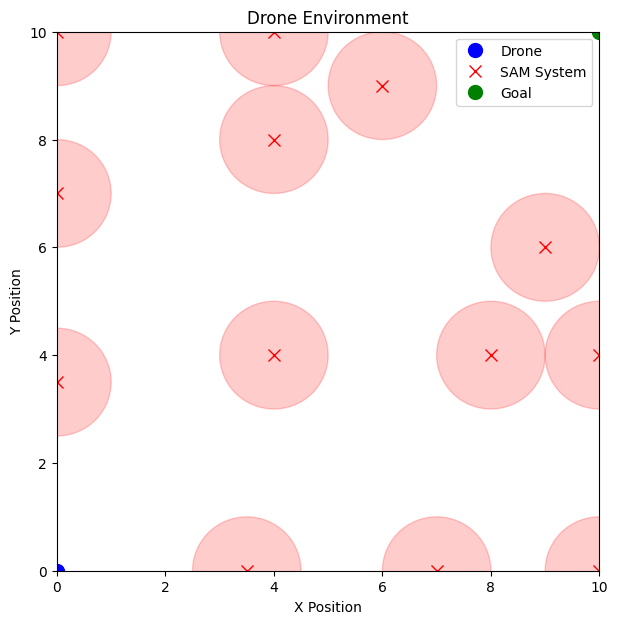

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

SAMPos = np.array([[10, 0], [3.5, 0], [4, 4], [8, 4], [9, 6], [7, 0], [10, 4], [0, 10], [0, 3.5], [4, 8], [6, 9], [0, 7], [4, 10]], dtype=np.float32)

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.plot(0, 0, 'bo', markersize=10, label="Drone")
ax.plot(SAMPos[:, 0], SAMPos[:, 1], 'rx', markersize=8, label="SAM System")

for pos in SAMPos:
    range_circle = patches.Circle((pos[0], pos[1]), 1, color='r', alpha=0.2)
    ax.add_patch(range_circle)

ax.plot(10, 10, 'go', markersize=10, label="Goal")

ax.legend(loc="upper right")
ax.grid(False)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Drone Environment")

In [3]:
import spacy

text = 'North Korea is learning modern tactics fighting Ukraine, which should worry its southern neighbor'
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
for ent in doc.ents:
        if ent.label_ == "GPE":
            print(ent.text)

North Korea
Ukraine
